<a href="https://colab.research.google.com/github/Adamixa/Airbnb_listing_analysis/blob/main/Airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb analysis:

## 1. Data Loading and Initial Exploration:

### Imports:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Loading:

In [ ]:
df = pd.read_csv('../Airbnb_Data/Listings.csv', sep = ',', low_memory=False)

In [ ]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,11/29/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,4/13/2015,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,11/27/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,4/27/2012,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,7/16/2015,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


### Summarizing the Data:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

### Checking null value percentages:

In [ ]:
NA_perc = round((df.isna().sum()/len(df))*100.0,2) # get the NAs per column as perctentage
NA_perc

listing_id                      0.00
name                            0.02
host_id                         0.00
host_since                      0.06
host_location                   0.23
host_response_time              0.00
host_response_rate              0.00
host_acceptance_rate            0.00
host_is_superhost               0.00
host_total_listings_count       0.06
host_has_profile_pic            0.00
host_identity_verified          0.00
neighbourhood                   0.00
city                            0.00
latitude                        0.00
longitude                       0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bedrooms                       10.53
amenities                       0.00
price                           0.00
minimum_nights                  0.00
maximum_nights                  0.00
review_scores_rating            2.71
review_scores_accuracy          2.87
review_scores_cleanliness       2.85
r

In [ ]:
NA_perc[NA_perc>40]

host_response_time      46.04
host_response_rate      46.04
host_acceptance_rate    40.43
district                86.77
dtype: float64

We can see that 4 columns exceed our 40% null value threshold which are:
- host_response_time
- host_response_rate
- host_acceptance_rate
- district

### Finding all non numeric columns:

In [ ]:
df.select_dtypes(exclude='number').columns.tolist()

['name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'district',
 'city',
 'property_type',
 'room_type',
 'amenities',
 'instant_bookable']

### Checking for duplicates:

In [ ]:
dup_rows = df.duplicated() # check for duplicate
dup_rows.sum() # if used sum() fun will sum the total duplicate , if not will display t or f

0

No duplicates were found

## 2. Data Cleaning:

### Dealing with Null Values:

In [ ]:
# need to add
df.drop(['district'], axis=1, inplace=True)
df.drop([])

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,11/29/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,4/13/2015,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,11/27/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,4/27/2012,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,7/16/2015,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
hrt_mean = df['host_response_time'].mode()[0]
hrr_mean = df['host_response_rate'].mode()[0]
har_mean = df['host_acceptance_rate'].mode()[0]
df.host_response_time.fillna(hrt_mean, inplace=True)
df.host_response_rate.fillna(hrr_mean, inplace=True)
df.host_acceptance_rate.fillna(har_mean, inplace = True)

In [ ]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,11/29/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,4/13/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,11/27/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,4/27/2012,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,7/16/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


### Changing boolean columns from object (or string) to boolean because they are binary columns

In [ ]:
df['instant_bookable'] = df['instant_bookable'].replace({'f': False, 't': True })
df.instant_bookable = df.instant_bookable.astype(bool)

In [ ]:
df['host_is_superhost'] = df['host_is_superhost'].replace({'f': False, 't': True })
df.host_is_superhost = df.host_is_superhost.astype(bool)

In [ ]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'f': False, 't': True })
df.host_has_profile_pic = df.host_has_profile_pic.astype(bool)

In [ ]:
df['host_identity_verified'] = df['host_identity_verified'].replace({'f': False, 't': True })
df.host_identity_verified = df.host_identity_verified.astype(bool)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           279712 non-null  object 
 6   host_response_rate           279712 non-null  float64
 7   host_acceptance_rate         279712 non-null  float64
 8   host_is_superhost            279712 non-null  bool   
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279712 non-null  bool   
 11  host_identity_verified       279712 non-null  bool   
 12  neighbourhood                279712 non-null  object 
 13 

### Changing unnecessary float columns into int:

In [ ]:
df.bedrooms = df.bedrooms.astype('Int64')

In [ ]:
df.host_total_listings_count = df.host_total_listings_count.astype('Int64')

### Changing unnecessary string/object columns to float or int:

In [ ]:
df.host_response_rate = df.host_response_rate.astype('float64')

### Looking at unique object values:

In [ ]:
# take a look at the values
for col in df.nunique()[df.nunique() <100].index:
    print(col,":", df[col].unique() )

host_response_time : ['within an hour' 'within a few hours' 'within a day' 'a few days or more']
host_response_rate : [1.   0.   0.5  0.67 0.9  0.86 0.83 0.8  0.75 0.88 0.79 0.89 0.94 0.71
 0.95 0.3  0.25 0.6  0.33 0.43 0.2  0.84 0.4  0.92 0.17 0.97 0.87 0.38
 0.7  0.58 0.76 0.78 0.44 0.91 0.1  0.14 0.57 0.56 0.05 0.77 0.98 0.96
 0.93 0.72 0.29 0.63 0.11 0.68 0.69 0.81 0.82 0.73 0.85 0.46 0.22 0.99
 0.23 0.13 0.36 0.12 0.47 0.55 0.06 0.08 0.09 0.62 0.65 0.64 0.28 0.53
 0.39 0.59 0.41 0.27 0.31 0.74 0.03 0.52 0.04 0.54 0.61 0.21 0.07 0.45
 0.42 0.51 0.48 0.19 0.15 0.01 0.24]
host_is_superhost : [False  True]
host_has_profile_pic : [ True False]
host_identity_verified : [False  True]
city : ['Paris' 'New York' 'Bangkok' 'Rio de Janeiro' 'Sydney' 'Istanbul' 'Rome'
 'Hong Kong' 'Mexico City' 'Cape Town']
room_type : ['Entire place' 'Private room' 'Hotel room' 'Shared room']
accommodates : [ 2  4  3  1  5  6  7  8  9 10 14 12 11 16 13 15  0]
bedrooms : <IntegerArray>
[   1, <NA>,    2,    3

In [ ]:
# col_to_plot = df.select_dtypes(exclude='number').columns.tolist()
# f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(10, 15))
# for i,x in zip(col_to_plot,axes.flat):
#     sns.countplot(data = df ,x = str(i) ,ax = x  ,palette="muted")
# f.show()
# plt.tight_layout()

## 3. Exploratory Data Analysis:

In [ ]:
sns.scatterplot(x=df.index,y=df.price, hue=df['city'])
plt.xlabel("Listings");


In [ ]:
instant_count = df['instant_bookable'].value_counts() # Calculate the count of each
custom_colors = ['#FF0000', '#00FF00']

plt.figure(figsize=(10, 6)) # Create pie chart
plt.pie(instant_count, labels=instant_count .index, autopct='%1.0f%%', startangle=90, colors=custom_colors)
plt.axis('equal')
plt.title('Is the listing instantly bookable?')
plt.show()

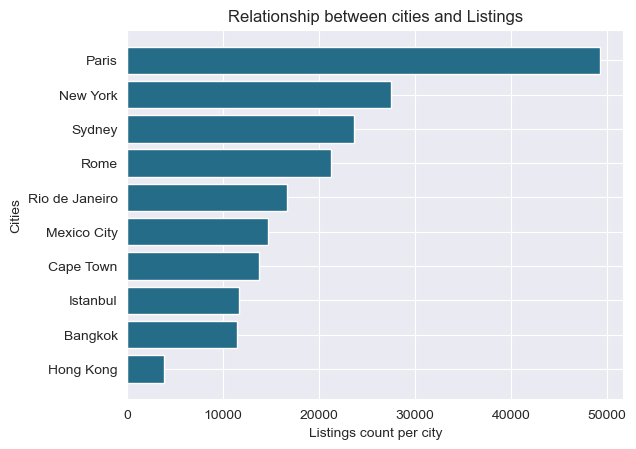

In [ ]:
city_count = df.groupby('city')['city'].count().sort_values()

# Create a bar chart with custom bar color
plt.barh(city_count.index, city_count, color='#246C88')

# Add labels and title
plt.ylabel('Cities')
plt.xlabel('Listings count per city')
plt.title('Relationship between cities and Listings')

plt.show()

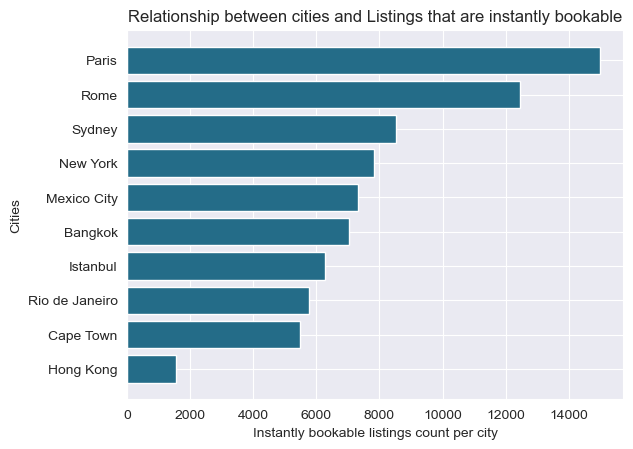

In [ ]:
city_count = df.query("instant_bookable").groupby('city')['city'].count().sort_values()

# Create a bar chart with custom bar color
plt.barh(city_count.index, city_count, color='#246C88')

# Add labels and title
plt.ylabel('Cities')
plt.xlabel('Instantly bookable listings count per city')
plt.title('Relationship between cities and Listings that are instantly bookable')

plt.show()

## 4. Feature Engineering

First we will create a reduced version of the listings dataframe

In [ ]:
dfstripped = df[['listing_id','name','city','price', 'instant_bookable']]
dfstripped

,listing_id,name,city,price,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",Paris,53,False
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),Paris,120,False
2,4082273,"Lovely apartment with Terrace, 60m2",Paris,89,False
3,4797344,Cosy studio (close to Eiffel tower),Paris,58,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,Paris,60,False
...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,Paris,120,False
279708,38538692,Cozy Studio in Montmartre,Paris,60,False
279709,38683356,Nice and cosy mini-appartement in Paris,Paris,50,False
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,Paris,105,False


Then we will add the reviews dataframe

In [ ]:
dfr = pd.read_csv('../Airbnb_Data/Reviews.csv', sep = ',')
dfr

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


we combine the reduced dataframe with the reviews dataset

In [ ]:
df_combined = pd.merge(dfstripped, dfr, on=["listing_id"])
df_combined
# inner_merged_total = pd.merge(
#     ...     climate_temp, climate_precip, on=["STATION", "DATE"]
# ... )

,listing_id,name,city,price,instant_bookable,review_id,date,reviewer_id
0,281420,"Beautiful Flat in le Village Montmartre, Paris",Paris,53,False,173279221,2017-07-23,3501898
1,281420,"Beautiful Flat in le Village Montmartre, Paris",Paris,53,False,172657766,2017-07-21,74346703
2,3705183,39 mÂ² Paris (Sacre CÅ“ur),Paris,120,False,20792760,2014-10-05,21583508
3,3705183,39 mÂ² Paris (Sacre CÅ“ur),Paris,120,False,32282670,2015-05-16,32285553
4,3705183,39 mÂ² Paris (Sacre CÅ“ur),Paris,120,False,45645391,2015-09-04,34310199
...,...,...,...,...,...,...,...,...
5373138,38683356,Nice and cosy mini-appartement in Paris,Paris,50,False,532395580,2019-09-19,10347403
5373139,38683356,Nice and cosy mini-appartement in Paris,Paris,50,False,553159713,2019-10-23,197011717
5373140,39659000,Charming apartment near Rue Saint Maur / Oberk...,Paris,105,False,556350613,2019-10-29,102836346
5373141,40219504,Cosy apartment with view on Canal St Martin,Paris,70,False,597833586,2020-01-26,21707358


We count how many reviews each listing have and put them in a series

In [ ]:
counts = df_combined.groupby('listing_id').size()
counts

listing_id
2577         1
2595        48
2737         7
2903        55
3079        17
            ..
48229422     1
48242873     1
48255009     1
48256649     1
48263869     1
Length: 193556, dtype: int64

we merge that series onto the listings dataset as number_of_reviews column

In [ ]:
df = df.merge(counts.rename('number_of_reviews'), on=['listing_id'])

In [ ]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,number_of_reviews
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,2
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,11/29/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,6
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193551,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,4/13/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,2
193552,38538692,Cozy Studio in Montmartre,10294858,11/27/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,2
193553,38683356,Nice and cosy mini-appartement in Paris,2238502,4/27/2012,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,3
193554,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,7/16/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1
